# Three Clustering Models

Joseph Wagner

### Imports & Data Ingestion

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from pprint import pprint
import stackprinter

pd.set_option('display.max_columns', None)
stackprinter.set_excepthook(style='lightbg')

In [2]:
repos_df = pd.read_pickle('./Data/repo_200.pk1')

In [3]:
repos_df.shape

(200, 24)

In [4]:
repos_df.head()

,createdAt,description,totalForks,hasIssuesEnabled,hasWikiEnabled,id,totalIssues,licenseInfo,name,nameWithOwner,readMe,owner,primaryLanguage,totalPullRequests,totalCommits,totalStargazers,updatedAt,commit_count,issue_count,pull_request_count,stars_count,pr_duration,pr_assoc,is_assoc
0,2016-08-21 05:31:51+00:00,An android process bar library associated with...,37,True,True,MDEwOlJlcG9zaXRvcnk2NjE4Mjg1MA==,0,None,android_ProcessBar,hzw1199/android_ProcessBar,# Process Bar\n[![](https://jitpack.io/v/hzw11...,hzw1199,Java,0,10.0,199,2019-08-28 06:14:45+00:00,"[[9, 1]]",None,None,"[[143, 16, 3, 6, 2, 2, 1, 2, 3, 3, 1, 2, 1, 1,...",None,None,None
1,2015-10-20 18:22:34+00:00,A ScrollView component that handles keyboard a...,377,True,True,MDEwOlJlcG9zaXRvcnk0NDYyNjI1MA==,272,MIT,react-native-keyboard-aware-scroll-view,APSL/react-native-keyboard-aware-scroll-view,# react-native-keyboard-aware-scroll-view\n\n<...,APSL,JavaScript,110,166.0,3118,2019-09-09 21:17:49+00:00,"[[2, 6, 2, 1, 4, 7, 9, 1, 5, 2, 6, 4, 3, 7, 4,...","[[2, 3, 2, 10, 14, 6, 6, 5, 3, 5, 5, 5, 7, 3, ...","[[1, 1, 3, 6, 2, 5, 3, 4, 2, 4, 4, 2, 2, 5, 5,...","[[1, 17, 2, 7, 5, 6, 16, 13, 27, 30, 39, 38, 4...","[[11 days 02:17:31, 521 days 17:08:22, 2 days ...",CONTRIBUTOR MEMBER NONE OW...,CONTRIBUTOR MEMBER NONE OW...
2,2015-11-24 12:43:44+00:00,Sample app to demonstrate multidex,51,True,True,MDEwOlJlcG9zaXRvcnk0Njc5MTAyMg==,1,None,multidex-sample,mmadev/multidex-sample,# multidex-sample\nSample app to demonstrate m...,mmadev,Java,0,2.0,118,2019-03-22 01:44:33+00:00,[[2]],[[1]],None,"[[27, 20, 8, 1, 5, 3, 4, 5, 2, 4, 4, 1, 1, 3, ...",None,None,CONTRIBUTOR MEMBER NONE OWNER C...
3,2015-10-05 09:34:22+00:00,multiNetX is a python package for the manipula...,31,True,True,MDEwOlJlcG9zaXRvcnk0MzY3NTc1OQ==,6,None,multinetx,nkoub/multinetx,![png](logo.png) multiNetX v2.0 \n=========\n\...,nkoub,Jupyter Notebook,3,70.0,104,2019-08-22 15:04:41+00:00,"[[41, 12, 3, 3, 2, 1, 3, 5]]","[[1, 1, 1, 1, 1, 1]]","[[1, 2]]","[[1, 40, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1...","[[4 days 04:09:04, 0 days 03:50:42]]",CONTRIBUTOR MEMBER NONE OWNER C...,CONTRIBUTOR MEMBER NONE OWNER C...
4,2013-07-18 14:39:58+00:00,Painlessly create beautiful matplotlib plots.,140,True,True,MDEwOlJlcG9zaXRvcnkxMTUwNTIxOA==,64,MIT,prettyplotlib,olgabot/prettyplotlib,# Announcement\n\nThank you to everyone who ha...,olgabot,Python,37,252.0,1482,2019-09-09 13:16:14+00:00,"[[3, 70, 8, 18, 3, 27, 35, 12, 21, 12, 15, 17,...","[[1, 5, 1, 3, 10, 4, 5, 4, 2, 9, 4, 4, 1, 1, 1...","[[1, 4, 3, 8, 2, 1, 3, 5, 4, 3, 1, 1, 1]]",None,"[[1 days 12:00:22, 54 days 08:35:33.750000, 1 ...",CONTRIBUTOR MEMBER NONE OWNE...,CONTRIBUTOR MEMBER NONE O...


### Type Conversions & Encodings for PCA

**Design note**: Instead of mutating columns `inplace`, I'll build up a new `DataFrame` consisting of numeric data from `repos_df`.

* Divide total values by age of the repo

In [5]:
from category_encoders.ordinal import OrdinalEncoder as OrdEnc

In [6]:
pca_df = pd.DataFrame()

In [7]:
# Replace missing values for all columns
repos_df = repos_df[:].replace(np.NaN, 0)
repos_df = repos_df[:].replace('None', 0)

# Convert pd.Timestamp-type columns to float for PCA
time_cols = ['createdAt', 'updatedAt']
for column in time_cols:
    pca_df[column] = repos_df[column].values.astype('datetime64').astype(int).astype(float)

# Check Timestamp conversion
print(pca_df['createdAt'].iloc[0])
pca_df[['createdAt','updatedAt']].dtypes

1.471757511e+18


/home/joseph/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/joseph/.local/lib/python3.7/site-packages/pandas/core/missing.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


createdAt    float64
updatedAt    float64
dtype: object

In [8]:
# Convert boolean cols to integer
bool_cols = ['hasIssuesEnabled', 'hasWikiEnabled']
for column in bool_cols:
    pca_df[column] = repos_df[column].astype(np.int8)

# Check Boolean conversion
pca_df[['hasIssuesEnabled', 'hasWikiEnabled']].dtypes

hasIssuesEnabled    int8
hasWikiEnabled      int8
dtype: object

In [9]:
# Append numeric cols from repos_df to pca_df
numeric_cols = ['totalForks', 'totalIssues', 'totalPullRequests', 'totalCommits', 'totalStargazers']
for column in numeric_cols:
    pca_df[column] = repos_df[column].astype(np.int16)

pca_df[['totalForks', 'totalIssues', 'totalPullRequests', 'totalCommits', 'totalStargazers']].dtypes

totalForks           int16
totalIssues          int16
totalPullRequests    int16
totalCommits         int16
totalStargazers      int16
dtype: object

In [10]:
# Use Ordinal encoding for low-cardinality string cols
ordinal_cols = ['licenseInfo', 'primaryLanguage']
for column in ordinal_cols:
    encoder = OrdEnc()
    pca_df[column] = encoder.fit_transform(repos_df[column].values).astype(np.int8)

pca_df[['licenseInfo', 'primaryLanguage']].dtypes

licenseInfo        int8
primaryLanguage    int8
dtype: object

In [11]:
# Set pca_df indices to respective repo names
pca_df.index = repos_df['name']

# Dropping these columns for due to interference with clustering
pca_df.drop(axis='columns', labels=['createdAt','updatedAt'], inplace=True)

pca_df.head()

,hasIssuesEnabled,hasWikiEnabled,totalForks,totalIssues,totalPullRequests,totalCommits,totalStargazers,licenseInfo,primaryLanguage
name,,,,,,,,,
android_ProcessBar,1,1,37,0,0,10,199,1,1
react-native-keyboard-aware-scroll-view,1,1,377,272,110,166,3118,2,2
multidex-sample,1,1,51,1,0,2,118,1,1
multinetx,1,1,31,6,3,70,104,1,3
prettyplotlib,1,1,140,64,37,252,1482,2,4


### Scale `pca_df`

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

> For each value in a feature, `MinMaxScaler` subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. `MinMaxScaler` preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. Note that `MinMaxScaler` doesn’t reduce the importance of outliers. The default range for the feature returned by `MinMaxScaler` is 0 to 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1), copy=True)
scaled_pca_array = scaler.fit_transform(pca_df)

In [14]:
scaled_pca_array

array([[1.00000000e+00, 1.00000000e+00, 1.82492159e-03, ...,
        6.68850198e-03, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.12147134e-02, ...,
        1.07326323e-01, 7.69230769e-02, 2.85714286e-02],
       [1.00000000e+00, 1.00000000e+00, 2.62332478e-03, ...,
        3.89588002e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 3.42172797e-03, ...,
        7.65385278e-03, 0.00000000e+00, 1.42857143e-01],
       [1.00000000e+00, 1.00000000e+00, 2.11006558e-03, ...,
        2.64437166e-02, 2.30769231e-01, 8.57142857e-02],
       [1.00000000e+00, 1.00000000e+00, 5.13259196e-04, ...,
        1.68591622e-02, 7.69230769e-02, 2.85714286e-02]])

### PCA Dimensionality Reduction

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=6)
# pca_array = pca.fit_transform(pca_df.values)
pca_array = pca.fit_transform(scaled_pca_array)

In [17]:
pca_array[::20]

array([[-1.10799340e-01, -2.40483536e-01, -1.08799724e-01,
        -1.15842679e-01,  7.58921460e-03, -9.59477272e-03],
       [-1.20437641e-01, -1.55942930e-01, -9.50827092e-02,
        -1.14584027e-01,  9.20715314e-03, -7.53342919e-03],
       [ 8.85008011e-01, -4.27600636e-02, -1.49256917e-02,
        -1.12684299e-01, -2.20280567e-02, -8.44638045e-02],
       [-1.13469358e-01, -2.13043305e-01, -9.98285212e-02,
        -1.16403549e-01,  3.14883237e-03, -6.78410124e-03],
       [ 8.43414960e-01,  1.67406527e-01, -1.45322324e-01,
        -6.55276516e-02, -1.69353183e-02, -8.50670375e-02],
       [-2.04622604e-01,  5.47854222e-01, -3.43444256e-02,
        -8.69993963e-02, -3.47385798e-02,  2.81584470e-02],
       [-2.06607213e-01,  6.00197618e-01, -8.35262825e-03,
        -1.11282256e-02, -3.66371845e-02,  2.97948024e-02],
       [ 7.63802974e-01,  7.91357532e-01, -1.17995065e-01,
        -1.13427689e-01, -5.29410362e-02, -5.38989050e-02],
       [-1.58015743e-01,  2.83612588e-01,  3.599

### 3 Clustering Models as Base Estimators

* Each model should output a predicted centroid value for each repository, either 1 or 2.

In [18]:
Image(url='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png', height=800, width=800)

#### K-Means Clustering

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
# 2 clusters for differentiating between "successful" and "unsuccessful" repos
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000, n_jobs=-1)

data2D = kmeans.fit_transform(pca_array)
y_pred = kmeans.fit_predict(pca_array)

In [21]:
# X,y coordinates after transformation
coord_df = pd.DataFrame(data2D, columns=['X','Y'])

In [22]:
# Centroids of observations
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1]


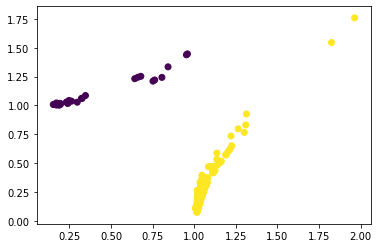

In [23]:
plt.scatter(coord_df['X'], coord_df['Y'], c=y_pred);

In [24]:
# get indices of y_pred 0s to see what repos are outliers
index_list = []
for ind, obs in enumerate(y_pred):
    if obs == 0:
        index_list.append(ind)

In [25]:
y_pred_1s = []
for ind in index_list:
    y_pred_1s.append(pca_df.index[ind])

print(y_pred_1s)

['grace', 'standard', 'monod', 'jrnl', 'elixir', 'IndexedDB', 'carbon', 'open-event-frontend', 'owl', 'fuzzysearch', 'MediaPlayer-Extended', 'pyxl', 'python-iocextract', 'subtome', 'graphiql', 'googleplay-api', 'ac-js2', 'webscalesql-5.6', 'alwsl', 'ufo', 'thunderpush', 'Adafruit_BMP280_Library', 'restfb', 'acl-ue4-plugin', 'kob']


In [26]:
y_pred_2s = []
for ind in range(0,200):
    if ind not in index_list:
        y_pred_2s.append(pca_df.index[ind])

print(y_pred_2s)

['android_ProcessBar', 'react-native-keyboard-aware-scroll-view', 'multidex-sample', 'multinetx', 'prettyplotlib', 'GithubFinder', 'LeetCode', 'squirrel', 'redoc', 'smoothing', 'SharpRepository', 'leetcode', 'protobuf-codec', 'ratos', 'preact-compat', 'raspberry-pi-web-simulator', 'KNPathTableViewController', 'MatchModels', 'django-favorites', 'MacDeveloper', 'analytics.js-integrations', 'Slogger', 'PrimeDatePicker', 'awesome-atom-packages', 'sicp-study', 'tika-similarity', 'VENTouchLock', 'aurelia-materialize-bridge', 'FaceDetect', 'jquery-rails', 'LiteBSD', 'recheck-web', 'nosql-database.org', 'eShopOnContainers', 'sqlite-erlang', 'semaphore', 'mzitu', 'FlexiblePageControl', 'pyofc2', 'Arduino-IRremote', 'grid-window', 'androiddev', 'go-internal', 'KSToastView', 'static-vectors', 'net-irc', 'LPCNet', 'tinypc', 'docker-symfony', 'cv-maker', 'angularfire2', 'haxe', 'magic_numbers', 'cssgrid', 'bCNC', 'JSNetworkX', 'dwv', 'CRGradientNavigationBar', 'react-native-timeline-listview', 'boo

---------------
#### `y_pred_1s` vs `y_pred_2s` Result

* It seems that the **1 values are less popular repos overall** (with some exceptions), and that the majority of the **2 values are popular repos**. 
* There are some repos in the 1s list that are closer to the popularity level of the 1s list. 
* The model needs fine-tuning, but for now I'll continue with the next clustering model so as to get to building the meta estimator.

-------------

#### Agglomerative Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering 

In [28]:
ac_model = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean', compute_full_tree=True)

y = ac_model.fit_predict(coord_df.values)

In [29]:
y = [pred+1 for pred in y]
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

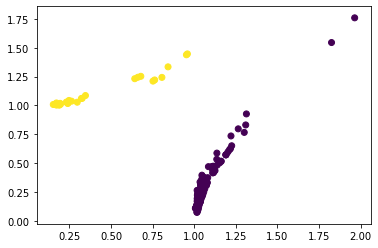

In [30]:
plt.scatter(coord_df['X'], coord_df['Y'], c=y);

In [47]:
# get indices of y 0s
index_list = []
for ind, obs in enumerate(y):
    if obs == 1:
        index_list.append(ind)

y_1s = []
for ind in index_list:
    y_1s.append(pca_df.index[ind])
print('y_1s: \n', y_1s, '\n')

y_2s = []
for ind in range(0,200):
    if ind not in index_list:
        y_2s.append(pca_df.index[ind])
print('y_2s: \n', y_2s)

y_1s: 
 ['android_ProcessBar', 'react-native-keyboard-aware-scroll-view', 'multidex-sample', 'multinetx', 'prettyplotlib', 'GithubFinder', 'LeetCode', 'squirrel', 'redoc', 'smoothing', 'SharpRepository', 'leetcode', 'protobuf-codec', 'ratos', 'preact-compat', 'raspberry-pi-web-simulator', 'KNPathTableViewController', 'MatchModels', 'django-favorites', 'MacDeveloper', 'analytics.js-integrations', 'Slogger', 'PrimeDatePicker', 'awesome-atom-packages', 'sicp-study', 'tika-similarity', 'VENTouchLock', 'aurelia-materialize-bridge', 'FaceDetect', 'jquery-rails', 'LiteBSD', 'recheck-web', 'nosql-database.org', 'eShopOnContainers', 'sqlite-erlang', 'semaphore', 'mzitu', 'FlexiblePageControl', 'pyofc2', 'Arduino-IRremote', 'grid-window', 'androiddev', 'go-internal', 'KSToastView', 'static-vectors', 'net-irc', 'LPCNet', 'tinypc', 'docker-symfony', 'cv-maker', 'angularfire2', 'haxe', 'magic_numbers', 'cssgrid', 'bCNC', 'JSNetworkX', 'dwv', 'CRGradientNavigationBar', 'react-native-timeline-listvie

------
#### t-SNE Scaling and Hierarchical Clustering

t-SNE Wikipedia: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

Scipy `cluster.hierarchy` docs: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import TSNE

In [34]:
def print_repo_clusters(fcluster_Z, fcluster_t):
    """
    Given f-cluster linkage arguments, return a dict of repos and their
    total count of Stargazers separated by associated cluster.
    """
    repo_fclusters = fcluster(Z=fcluster_Z, t=fcluster_t, criterion='distance')
    unique_clusters = np.unique(repo_fclusters)
    print('Unique clusters: ', unique_clusters)

    dict_of_clusters = {}
    for cluster in unique_clusters:
        repo_fcluster_ind = np.argwhere(repo_fclusters==cluster)
        repo_cluster_list = []

        for ind in repo_fcluster_ind:
            repo_name_stars = [pca_df.index[ind][0], \
                               pca_df.iloc[ind]['totalStargazers'].values[0]]
            repo_cluster_list.append(repo_name_stars)

        dict_of_clusters[cluster] = repo_cluster_list
    
    return dict_of_clusters

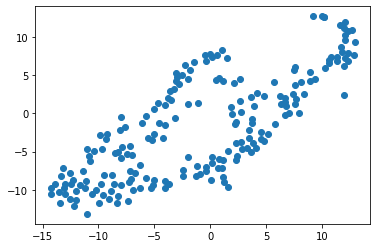

In [35]:
# Call fit_transform() on the unscaled, pre-PCA data
tsne_unscaled = TSNE(n_components=2).fit_transform(pca_df.values)
tsne_unscaled
plt.scatter(tsne_unscaled.T[0], tsne_unscaled.T[1])

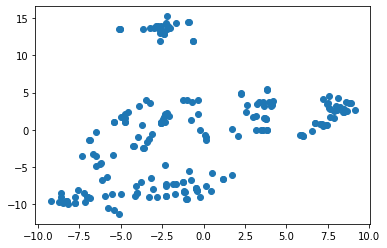

In [36]:
# Call fit_transform() on scaled, pre-PCA data
tsne_scaled = TSNE(n_components=2).fit_transform(scaled_pca_array)
tsne_scaled
plt.scatter(tsne_scaled.T[0], tsne_scaled.T[1])

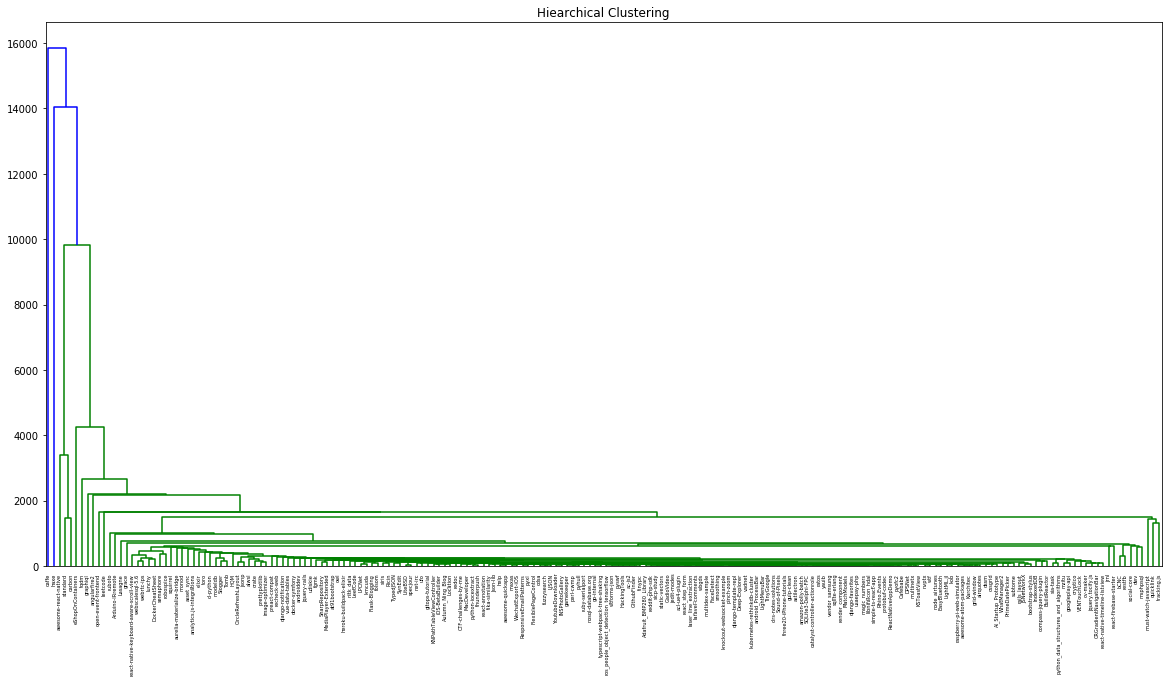

In [37]:
# Plot Hierarchical clusters on unscaled data
linked = linkage(pca_df.values, 'single')
labelList = pca_df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

In [38]:
# Using unscaled data
pprint(print_repo_clusters(linked, 500))

Unique clusters:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
{1: [['standard', 22331]],
 2: [['carbon', 21275]],
 3: [['awesome-react-native', 25228]],
 4: [['react-native-keyboard-aware-scroll-view', 3118],
     ['semaphore', 3198],
     ['lunchy', 2652],
     ['robospice', 3034],
     ['DockerCheatSheet', 2817],
     ['webscalesql-5.6', 3010],
     ['webrtc-ips', 3046]],
 5: [['android_ProcessBar', 199],
     ['multidex-sample', 118],
     ['multinetx', 104],
     ['prettyplotlib', 1482],
     ['GithubFinder', 126],
     ['LeetCode', 327],
     ['redoc', 391],
     ['smoothing', 83],
     ['SharpRepository', 451],
     ['protobuf-codec', 40],
     ['ratos', 21],
     ['preact-compat', 831],
     ['raspberry-pi-web-simulator', 268],
     ['KNPathTableViewController', 586],
     ['MatchModels', 31],
     ['django-favorites', 31],
     ['MacDeveloper', 212],
     ['analytics.js-integrations', 71],
     ['Slogger', 770],
     ['PrimeDateP

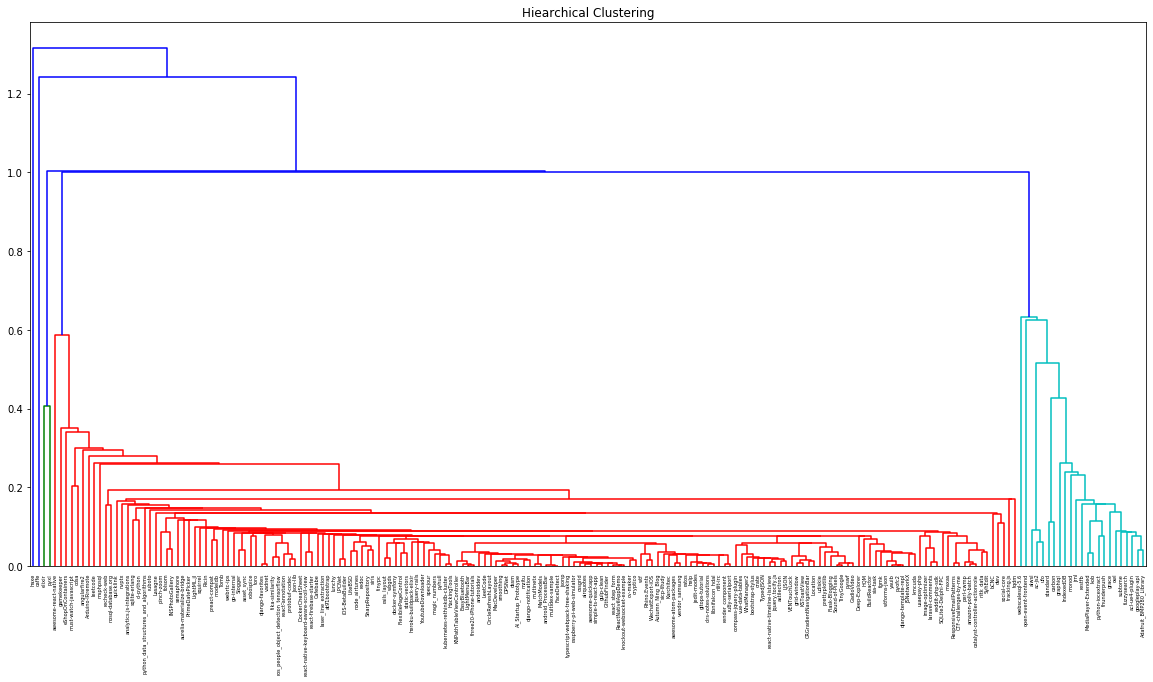

In [39]:
# Plot Hierarchical clusters on PCA scaled data
linked = linkage(scaled_pca_array, 'single')
labelList = pca_df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

In [40]:
# Using PCA scaled data
pprint(print_repo_clusters(linked, 1.0))

Unique clusters:  [1 2 3 4 5]
{1: [['elixir', 1104], ['pyxl', 451]],
 2: [['android_ProcessBar', 199],
     ['react-native-keyboard-aware-scroll-view', 3118],
     ['multidex-sample', 118],
     ['multinetx', 104],
     ['prettyplotlib', 1482],
     ['GithubFinder', 126],
     ['LeetCode', 327],
     ['squirrel', 2269],
     ['redoc', 391],
     ['smoothing', 83],
     ['SharpRepository', 451],
     ['leetcode', 7862],
     ['protobuf-codec', 40],
     ['ratos', 21],
     ['preact-compat', 831],
     ['raspberry-pi-web-simulator', 268],
     ['KNPathTableViewController', 586],
     ['MatchModels', 31],
     ['django-favorites', 31],
     ['MacDeveloper', 212],
     ['analytics.js-integrations', 71],
     ['Slogger', 770],
     ['PrimeDatePicker', 150],
     ['awesome-atom-packages', 281],
     ['sicp-study', 79],
     ['tika-similarity', 77],
     ['VENTouchLock', 994],
     ['aurelia-materialize-bridge', 160],
     ['FaceDetect', 99],
     ['jquery-rails', 885],
     ['LiteBSD', 236],

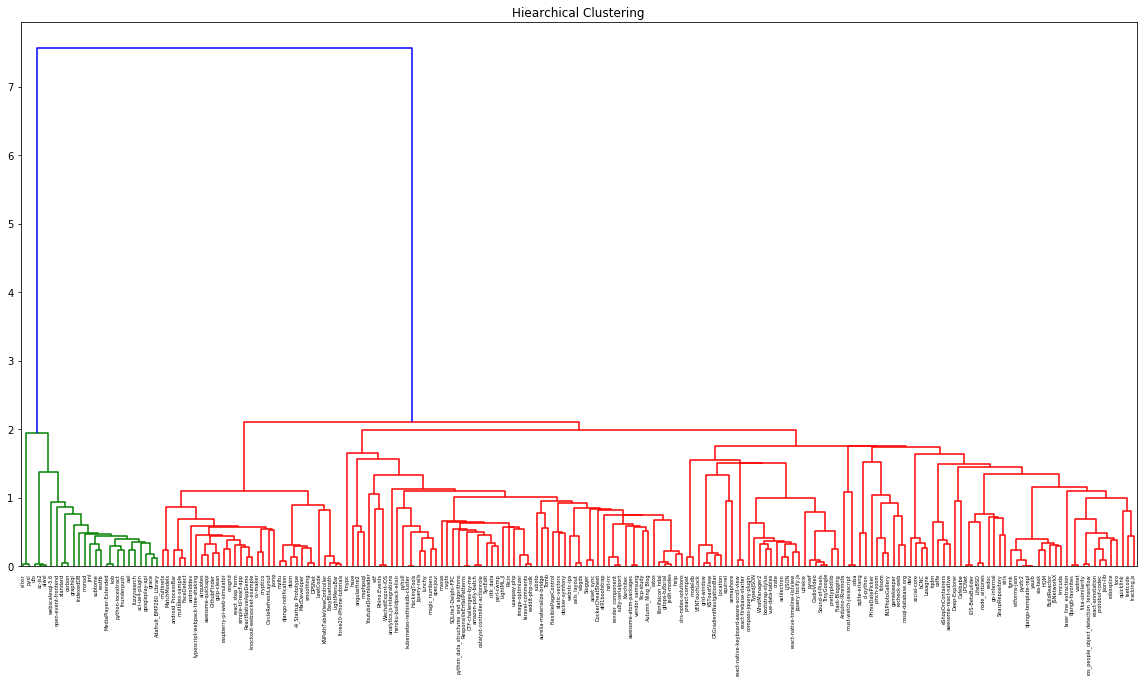

In [41]:
# Plot Hierarchical clusters on tSNE-scaled data
linked = linkage(tsne_scaled, 'single')
labelList = pca_df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

In [42]:
# Using t-SNE scaled data
pprint(print_repo_clusters(linked, 3.0))

Unique clusters:  [1 2]
{1: [['grace', 4387],
     ['standard', 22331],
     ['monod', 875],
     ['jrnl', 3763],
     ['elixir', 1104],
     ['IndexedDB', 132],
     ['carbon', 21275],
     ['open-event-frontend', 1075],
     ['owl', 586],
     ['fuzzysearch', 465],
     ['MediaPlayer-Extended', 375],
     ['pyxl', 451],
     ['python-iocextract', 187],
     ['subtome', 141],
     ['graphiql', 9114],
     ['googleplay-api', 784],
     ['ac-js2', 120],
     ['webscalesql-5.6', 3010],
     ['alwsl', 1319],
     ['ufo', 219],
     ['thunderpush', 201],
     ['Adafruit_BMP280_Library', 112],
     ['restfb', 609],
     ['acl-ue4-plugin', 55],
     ['kob', 322]],
 2: [['android_ProcessBar', 199],
     ['react-native-keyboard-aware-scroll-view', 3118],
     ['multidex-sample', 118],
     ['multinetx', 104],
     ['prettyplotlib', 1482],
     ['GithubFinder', 126],
     ['LeetCode', 327],
     ['squirrel', 2269],
     ['redoc', 391],
     ['smoothing', 83],
     ['SharpRepository', 451],
    

---------------
### Import Pickled DTW Data for Repos 

In [43]:
dtw_df = pd.read_pickle('Data/merge_df2.pk1')
dtw_df.head()

,hasIssuesEnabled,hasWikiEnabled,licenseInfo,primaryLanguage,readMeInstall,AOKP-vendor_samsung_cm,APSL-react-native-keyboard-aware-scroll-view_cm,AdamNowotny-BuildReactor_cm,AllThingsSmitty-must-watch-javascript_cm,AssetSync-asset_sync_cm,Azure-Samples-raspberry-pi-web-simulator_cm,BVLC-caffe_cm,GcsSloop-MacDeveloper_cm,GoogleChromeLabs-pinch-zoom_cm,GoogleChromeLabs-quicklink_cm,GraxCode-Cafebabe_cm,HardySimpson-clrs-notes-solutions_cm,HashNuke-heroku-buildpack-elixir_cm,HaxeFoundation-haxe_cm,HunterHillegas-iOS-BetaBuilder_cm,InQuest-python-iocextract_cm,InsaneLife-dssm_cm,JohnMunsch-airquotes_cm,JohnWeisz-TypedJSON_cm,JulienPalard-yauib_cm,Kornil-simple-ts-react-app_cm,Lasagne-Lasagne_cm,Laxa-HackingTools_cm,LianjiaTech-kob_cm,MaiaVictor-LJSON_cm,MichaelJWelsh-cdsa_cm,NervanaSystems-maxas_cm,P01son6415-MatchModels_cm,PaulKlinger-tinypc_cm,PegasusWang-python_data_structures_and_algorithms_cm,RailsApps-rails_layout_cm,RicinApp-Ricin_cm,ScottyB-ac-js2_cm,SharpRepository-SharpRepository_cm,SynEdit-SynEdit_cm,TailorDev-monod_cm,Tyrrrz-YoutubeDownloader_cm,aalmiray-Json-lib_cm,adafruit-Adafruit_BMP280_Library_cm,agentzh-amazon-polly-batch_cm,alwsl-alwsl_cm,aminography-PrimeDatePicker_cm,andytlr-cssgrid_cm,angular-angularfire2_cm,ansible-semaphore-semaphore_cm,apg-django-favorites_cm,artzub-wbgds_cm,asticode-astilectron_cm,atulmy-crate_cm,aurelia-ui-toolkits-aurelia-materialize-bridge_cm,awalgarg-cv-maker_cm,ayende-Rhino.Events_cm,benbjohnson-wtf_cm,beyondcode-laravel-comments_cm,blacksonic-typescript-webpack-tree-shaking_cm,blueudp-Deep-Explorer_cm,boundary-folsom_cm,bradtraversy-react_step_form_cm,brendanhay-gamekeeper_cm,briangraves-ResponsiveEmailPatterns_cm,bricef-gitops-tutorial_cm,btbytes-pyofc2_cm,c0ming-KSToastView_cm,cagbal-ros_people_object_detection_tensorflow_cm,carbon-app-carbon_cm,carlhoerberg-knockout-websocket-example_cm,chenjiandongx-mzitu_cm,chenliangloveyou-EasyBluetooth_cm,cho45-net-irc_cm,chrismattmann-tika-similarity_cm,christianroman-CRGradientNavigationBar_cm,codysoyland-django-template-repl_cm,coldfix-udiskie_cm,developit-preact-compat_cm,diafygi-webrtc-ips_cm,djspiewak-jedit-modes_cm,dotnet-architecture-eShopOnContainers_cm,dpavlin-perl-cwmp_cm,dropbox-pyxl_cm,dyne-Tomb_cm,eddiezane-lunchy_cm,edlich-nosql-database.org_cm,eduardolundgren-tracking.js_cm,egirault-googleplay-api_cm,eneim-toro_cm,eon01-DockerCheatSheet_cm,ericoporto-fgmk_cm,facebookarchive-grace_cm,facebookarchive-webscalesql-5.6_cm,fkling-JSNetworkX_cm,fossasia-open-event-frontend_cm,gabrielemariotti-androiddev_cm,gfranko-jquery.tocify.js_cm,go-siris-siris_cm,gouthambs-Flask-Blogging_cm,graphql-graphiql_cm,hangzhaomit-Sound-of-Pixels_cm,hcmlab-vadnet_cm,hzw1199-android_ProcessBar_cm,ianh-owl_cm,inspace-io-INSPhotoGallery_cm,ivmartel-dwv_cm,japaric-archived-nvptx_cm,jcleblanc-reddit-php-sdk_cm,jimweirich-sicp-study_cm,jondot-awesome-react-native_cm,jrnl-org-jrnl_cm,jtauber-archive-django-notification_cm,kam3k-laser_line_extraction_cm,karamanolev-WhatManager2_cm,kentnguyen-KNPathTableViewController_cm,kosmas58-compass-jquery-plugin_cm,kriasoft-react-firebase-starter_cm,kvesteri-wtforms-json_cm,l4wio-CTF-challenges-by-me_cm,laravel-elixir_cm,libnifalcon-libnifalcon_hdal_cm,linux4sam-at91bootstrap_cm,lithammer-fuzzysearch_cm,liuchuo-LeetCode_cm,llSourcell-AI_Startup_Prototype_cm,locuslab-smoothing_cm,lorddusk-HQM_cm,lperrin-node_airtunes_cm,malkia-ufo_cm,materialsvirtuallab-pyhull_cm,mattvague-three20-iPhone-tutorials_cm,maxmx-bootstrap-stylus_cm,maxpou-docker-symfony_cm,memoiry-LightML.jl_cm,metawilm-cl-python_cm,microsoft-msphpsql_cm,mitdbg-modeldb_cm,mlapshin-magic_numbers_cm,mmadev-multidex-sample_cm,mozilla-LPCNet_cm,msesma-Karchitec_cm,nfrechette-acl-ue4-plugin_cm,niunai2016-ReactNativeAppDemo_cm,njleonzhang-vue-data-tables_cm,nkoub-multinetx_cm,nltk-nltk_data_cm,noamross-redoc_cm,olgabot-prettyplotlib_cm,peter-vilja-gulp-clean_cm,plashenkov-SQLite3-Delphi-FPC_cm,pppoe-LightMenuBar_cm,protyposis-MediaPlayer-Extended_cm,python-social-auth-s